<a href="https://colab.research.google.com/github/Ranjankumar666/Mask_Detector_CNN/blob/main/Mask_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [13]:
! cp kaggle.json ~/.kaggle/

In [14]:
! kaggle datasets download -d ahemateja19bec1025/facemask-dataset

 95% 48.0M/50.4M [00:00<00:00, 65.7MB/s]
100% 50.4M/50.4M [00:00<00:00, 103MB/s] 


In [15]:
! chmod 600 ~/.kaggle/kaggle.json

In [16]:
! unzip /content/face-mask-detection.zip

unzip:  cannot find or open /content/face-mask-detection.zip, /content/face-mask-detection.zip.zip or /content/face-mask-detection.zip.ZIP.


In [17]:
! unzip /content/facemask-dataset.zip

Archive:  /content/facemask-dataset.zip
  inflating: dataset/dataset/0/0.jpg  
  inflating: dataset/dataset/0/1.jpg  
  inflating: dataset/dataset/0/10.jpg  
  inflating: dataset/dataset/0/100.jpg  
  inflating: dataset/dataset/0/101.jpg  
  inflating: dataset/dataset/0/102.jpg  
  inflating: dataset/dataset/0/104.jpg  
  inflating: dataset/dataset/0/105.jpg  
  inflating: dataset/dataset/0/106.jpg  
  inflating: dataset/dataset/0/107.jpg  
  inflating: dataset/dataset/0/108.jpg  
  inflating: dataset/dataset/0/109.jpg  
  inflating: dataset/dataset/0/11.jpg  
  inflating: dataset/dataset/0/110.jpg  
  inflating: dataset/dataset/0/111.jpg  
  inflating: dataset/dataset/0/112.jpg  
  inflating: dataset/dataset/0/114.jpg  
  inflating: dataset/dataset/0/115.jpg  
  inflating: dataset/dataset/0/116.jpg  
  inflating: dataset/dataset/0/117.jpg  
  inflating: dataset/dataset/0/118.jpg  
  inflating: dataset/dataset/0/119.jpg  
  inflating: dataset/dataset/0/12.jpg  
  inflating: dataset/dat

In [18]:
! rm -rf ./images

In [19]:
! rm -rf ./annotations

In [20]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [21]:
import os
import random 
def choose_rand_img(path):
    dir_files = os.listdir(path)
    selection = random.choice(dir_files)
    img = plt.imread(f'{path}/{selection}')
    plt.imshow(img)
    print(f"shape: {img.shape}")

    return img

shape: (428, 320, 3)


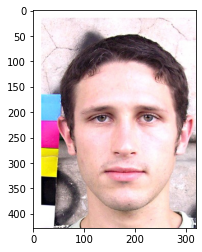

In [22]:
img = choose_rand_img('/content/dataset/dataset/0')

shape: (428, 320, 3)


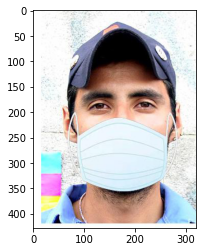

In [23]:
img = choose_rand_img('/content/dataset/dataset/1')

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
img_size= (224, 224)
batch_size=32
seed=42
data_path = '/content/dataset/dataset/'

data_gen = ImageDataGenerator(rescale=1./255,  validation_split=0.3)

train_data = data_gen.flow_from_directory(directory=data_path,target_size=img_size, batch_size=batch_size, subset='training', seed=42, class_mode='binary'  ) 
test_data = data_gen.flow_from_directory(directory=data_path,target_size=img_size, batch_size=batch_size, subset='validation', seed=42, class_mode='binary' ) 


Found 964 images belonging to 2 classes.
Found 412 images belonging to 2 classes.


In [25]:
tf.random.set_seed(42)

model1 = tf.keras.Sequential([
      tf.keras.layers.Conv2D(10, 3, input_shape=(224, 224, 3), activation='elu'),
      tf.keras.layers.Conv2D(10, 3,  activation='relu'),
      tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
      tf.keras.layers.Conv2D(10, 3,  activation='relu'),
      tf.keras.layers.Conv2D(10, 3,  activation='relu'),
      tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(1, 'sigmoid')
])

model1.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='Adam')

model1.fit(train_data,epochs=5,  steps_per_epoch=len(train_data), validation_data=test_data,  validation_steps=len(test_data) )

Epoch 1/5
31/31 [==============================] - 15s 184ms/step - loss: 0.3883 - accuracy: 0.8164 - val_loss: 0.1743 - val_accuracy: 0.9490
Epoch 2/5
31/31 [==============================] - 5s 162ms/step - loss: 0.1350 - accuracy: 0.9502 - val_loss: 0.1139 - val_accuracy: 0.9709
Epoch 3/5
31/31 [==============================] - 5s 171ms/step - loss: 0.0546 - accuracy: 0.9803 - val_loss: 0.1219 - val_accuracy: 0.9660
Epoch 4/5
31/31 [==============================] - 5s 172ms/step - loss: 0.0429 - accuracy: 0.9886 - val_loss: 0.1040 - val_accuracy: 0.9757
Epoch 5/5
31/31 [==============================] - 5s 170ms/step - loss: 0.0327 - accuracy: 0.9927 - val_loss: 0.1239 - val_accuracy: 0.9709


In [ ]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_13 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 108, 108, 14)      1274      
                                                                 
 conv2d_15 (Conv2D)          (None, 106, 106, 14)      1778      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 53, 53, 14)       0         
 2D)                                                  

In [32]:
from tensorflow.keras.preprocessing import image

def convert_for_model(img_path,model, target_size=img_size):
    img = image.load_img(img_path, target_size=target_size)
    x = image.img_to_array(img)
    x = x.reshape((1,)+ x.shape)

    return model.predict([x])

In [37]:
# Real image with mask
!wget -O mask-myths.jpg https://www.henryford.com/-/media/henry-ford-blog/images/interior-banner-images/2020/07/mask-myths.jpg?h=785&la=en&w=1920&hash=ADC164567A8E9350E957ACDCFEF2F78C


--2022-02-04 13:09:39--  https://www.henryford.com/-/media/henry-ford-blog/images/interior-banner-images/2020/07/mask-myths.jpg?h=785
Resolving www.henryford.com (www.henryford.com)... 104.22.69.148, 104.22.68.148, 172.67.22.86, ...
Connecting to www.henryford.com (www.henryford.com)|104.22.69.148|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 137478 (134K) [image/jpeg]
Saving to: ‘mask-myths.jpg’

mask-myths.jpg      100%[===================>] 134.26K  --.-KB/s    in 0.02s   

2022-02-04 13:09:40 (6.12 MB/s) - ‘mask-myths.jpg’ saved [137478/137478]



In [38]:
convert_for_model('/content/mask-myths.jpg', model1)

array([[1.]], dtype=float32)

In [36]:
! wget https://static01.nyt.com/images/2020/04/10/video/HowToMakeAMask_Cover_1/HowToMakeAMask_Cover_1-square640.jpg

--2022-02-04 13:09:07--  https://static01.nyt.com/images/2020/04/10/video/HowToMakeAMask_Cover_1/HowToMakeAMask_Cover_1-square640.jpg
Resolving static01.nyt.com (static01.nyt.com)... 151.101.1.164, 151.101.65.164, 151.101.129.164, ...
Connecting to static01.nyt.com (static01.nyt.com)|151.101.1.164|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66512 (65K) [image/jpeg]
Saving to: ‘HowToMakeAMask_Cover_1-square640.jpg’

HowToMakeAMask_Cove 100%[===================>]  64.95K  --.-KB/s    in 0.01s   

2022-02-04 13:09:07 (5.47 MB/s) - ‘HowToMakeAMask_Cover_1-square640.jpg’ saved [66512/66512]



In [39]:
convert_for_model('/content/HowToMakeAMask_Cover_1-square640.jpg', model1)

array([[1.]], dtype=float32)

In [42]:
!wget -O face_no_msk.jpg https://media.gettyimages.com/photos/confident-young-man-wearing-purple-tshirt-picture-id1092658864?s=612x612
convert_for_model('./face_no_msk.jpg', model1)

--2022-02-04 13:12:07--  https://media.gettyimages.com/photos/confident-young-man-wearing-purple-tshirt-picture-id1092658864?s=612x612
Resolving media.gettyimages.com (media.gettyimages.com)... 13.226.50.74, 13.226.50.125, 13.226.50.77, ...
Connecting to media.gettyimages.com (media.gettyimages.com)|13.226.50.74|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22008 (21K) [image/jpeg]
Saving to: ‘face_no_msk.jpg’

face_no_msk.jpg     100%[===================>]  21.49K  --.-KB/s    in 0.004s  

2022-02-04 13:12:07 (5.36 MB/s) - ‘face_no_msk.jpg’ saved [22008/22008]



array([[0.]], dtype=float32)

In [43]:
model1.save('./mask_detection.h5')

In [44]:
loaded_model = tf.keras.models.load_model('./mask_detection.h5')

In [45]:
convert_for_model('./face_no_msk.jpg', loaded_model)

array([[0.]], dtype=float32)